# Read and Parse Chainer logs

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
!ls cifar*.log

cifar-series-4.log            cifar_series_run_25fix.log
cifar-series.log              cifar_series_run_DL_25fix.log
cifar_errors.log


## CIFAR100 runs with various batch sizes and learning rates

In [3]:
run_pattern = re.compile(r"^run\s+(\d+)/(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [11]:
logfile="cifar_series_run_DL_25fix"
with open(logfile+".log","r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    ind = 0
    loss = 0
    acc = 0
    learn = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
    for line in lines:
        s = line.strip()
        m = run_pattern.match(s)        
        if m:
            run = int(m.group(1))
#            learn = float(m.group(2))            
#            run += 1
            #print batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1

In [12]:
df.head()

,run,epoch,loss,acc,time
0,1.0,1.0,4.63359,0.010782,24.2023
1,1.0,2.0,4.53762,0.020427,47.7632
2,1.0,3.0,4.33733,0.025408,71.2881
3,1.0,4.0,4.50350,0.021904,95.1400
4,1.0,5.0,4.33346,0.044514,119.0860


In [13]:
df_loss = df.pivot(index="run",columns="epoch",values="loss")
df_loss.index = df_loss.index.map(lambda s: "loss"+str(int(s)))
df_loss

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
loss1,4.63359,4.53762,4.33733,4.50350,4.33346,4.32129,3.90042,3.75364,3.62247,4.10353
loss2,4.59883,4.57749,5.07080,4.61183,4.55516,4.30797,4.17282,4.12210,3.81440,3.68087
loss3,4.61879,4.62029,5.12618,4.39106,4.30027,4.35557,4.69927,4.07943,4.44484,3.60814
loss4,4.66647,4.55647,4.42803,4.29684,4.21379,4.31061,4.24844,3.82693,3.91396,3.95353
loss5,4.61159,4.83171,4.70785,4.45125,4.45111,4.23825,4.03817,4.00555,3.73868,3.83643
loss6,4.60913,4.66252,4.48055,4.35771,4.29914,4.09666,4.08149,4.32661,4.01081,3.70675
loss7,5.07549,4.39418,4.30901,4.26824,4.12314,3.86624,3.89749,3.67261,3.66674,3.57238
loss8,4.59267,4.85851,5.07485,4.66268,4.21851,4.28754,4.08343,4.44624,3.87545,3.89203
loss9,4.60637,4.43859,4.36042,4.23475,4.20313,4.17164,3.94318,3.88414,3.98985,3.80056


In [14]:
df_acc = df.pivot(index="run",columns="epoch",values="acc")
df_acc.index = df_acc.index.map(lambda s: "acc"+str(int(s)))
df_acc

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
acc1,0.010782,0.020427,0.025408,0.021904,0.044514,0.046749,0.075092,0.094617,0.116378,0.084892
acc2,0.016326,0.016044,0.011087,0.014080,0.017509,0.031060,0.042107,0.048604,0.085346,0.112988
acc3,0.010599,0.009863,0.011966,0.025764,0.020927,0.037615,0.034174,0.058554,0.063649,0.110053
acc4,0.010501,0.014786,0.026109,0.031819,0.039987,0.031560,0.047007,0.088655,0.085920,0.084622
acc5,0.010133,0.009938,0.015275,0.014602,0.026212,0.038769,0.053395,0.065585,0.097042,0.093181
acc6,0.011673,0.011184,0.016263,0.027240,0.028630,0.047691,0.058519,0.049839,0.083410,0.109260
acc7,0.011403,0.019669,0.025862,0.028837,0.050643,0.076993,0.082548,0.101942,0.116073,0.128343
acc8,0.011184,0.010133,0.010587,0.016251,0.027872,0.038201,0.051132,0.047019,0.088115,0.105101
acc9,0.011230,0.027177,0.026361,0.030831,0.042819,0.051878,0.072059,0.084789,0.082072,0.110311


In [15]:
df_time = df.pivot(index="run",columns="epoch",values="time")
df_time.index = df_time.index.map(lambda s: "time"+str(int(s)))
df_time.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
run,,,,,,,,,,
time1,24.2023,47.7632,71.2881,95.1400,119.086,142.832,166.849,190.898,214.708,238.774
time2,24.7486,48.7061,72.4675,96.4987,120.556,144.390,168.477,192.557,216.417,240.508
time3,24.9194,48.8958,72.6861,96.7435,120.839,144.684,168.775,192.864,216.722,240.833
time4,25.0005,48.9843,72.7389,96.7511,120.795,144.612,168.680,192.740,216.590,240.679
time5,25.2572,49.2362,73.0223,97.0586,121.135,144.979,169.075,193.148,217.012,241.112


In [16]:
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [17]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [30]:
df_time["perc"] = df_time[10]
df_time["perc"] = RelativePercentDifference(df_time["perc"])
df_time

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
time1,24.2023,47.7632,71.2881,95.1400,119.086,142.832,166.849,190.898,214.708,238.774,99.141280
time2,24.7486,48.7061,72.4675,96.4987,120.556,144.390,168.477,192.557,216.417,240.508,99.861254
time3,24.9194,48.8958,72.6861,96.7435,120.839,144.684,168.775,192.864,216.722,240.833,99.996197
time4,25.0005,48.9843,72.7389,96.7511,120.795,144.612,168.680,192.740,216.590,240.679,99.932254
time5,25.2572,49.2362,73.0223,97.0586,121.135,144.979,169.075,193.148,217.012,241.112,100.112040
time6,24.7156,48.7000,72.4699,96.5246,120.584,144.440,168.527,192.618,216.463,240.561,99.883260
time7,25.0110,48.9806,72.7916,96.8565,120.948,144.794,168.904,193.000,216.876,240.976,100.055572
time8,24.7959,48.7674,72.5822,96.6503,120.733,144.600,168.711,192.824,216.687,240.788,99.977512
time9,24.8055,48.7752,72.5721,96.6296,120.710,144.556,168.659,192.746,216.606,240.701,99.941389


In [19]:
df_acc["perc"] = df_acc[10]
df_acc["perc"] = RelativePercentDifference(df_acc["perc"])
df_loss["perc"] = df_loss[10]
df_loss["perc"] = RelativePercentDifference(df_loss["perc"])
df_loss.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
loss1,4.63359,4.53762,4.33733,4.50350,4.33346,4.32129,3.90042,3.75364,3.62247,4.10353,112.314605
loss2,4.59883,4.57749,5.07080,4.61183,4.55516,4.30797,4.17282,4.12210,3.81440,3.68087,100.746299
loss3,4.61879,4.62029,5.12618,4.39106,4.30027,4.35557,4.69927,4.07943,4.44484,3.60814,98.755661
loss4,4.66647,4.55647,4.42803,4.29684,4.21379,4.31061,4.24844,3.82693,3.91396,3.95353,108.209069
loss5,4.61159,4.83171,4.70785,4.45125,4.45111,4.23825,4.03817,4.00555,3.73868,3.83643,105.004014


In [20]:
df_acc.head()

epoch,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,perc
run,,,,,,,,,,,
acc1,0.010782,0.020427,0.025408,0.021904,0.044514,0.046749,0.075092,0.094617,0.116378,0.084892,71.963132
acc2,0.016326,0.016044,0.011087,0.014080,0.017509,0.031060,0.042107,0.048604,0.085346,0.112988,95.780173
acc3,0.010599,0.009863,0.011966,0.025764,0.020927,0.037615,0.034174,0.058554,0.063649,0.110053,93.292167
acc4,0.010501,0.014786,0.026109,0.031819,0.039987,0.031560,0.047007,0.088655,0.085920,0.084622,71.734253
acc5,0.010133,0.009938,0.015275,0.014602,0.026212,0.038769,0.053395,0.065585,0.097042,0.093181,78.989990


In [23]:
def plotBox(df):
    meanlineprops = dict(linewidth=1, color=(0.2,.5,.8),linestyle="--")
    color = dict(medians=(1,.7,.3))
    df.plot.box(showmeans=True, meanline=True, 
                            color=color,meanprops=meanlineprops)
    ax = plt.gca()
    return ax

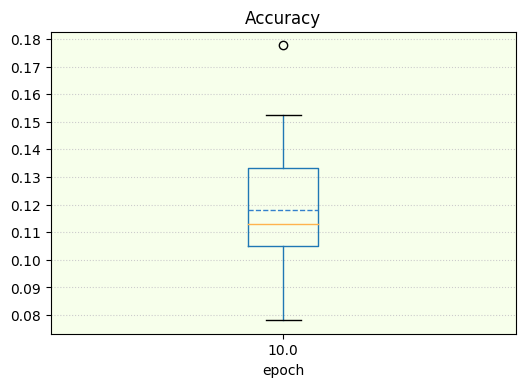

In [34]:
ax = plotBox(df_acc[10])
ax.set_title("Accuracy")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
major = np.arange(0.08,0.19,0.01)
ax.set_yticks(major)
ax.set_facecolor("#CBFF7725")



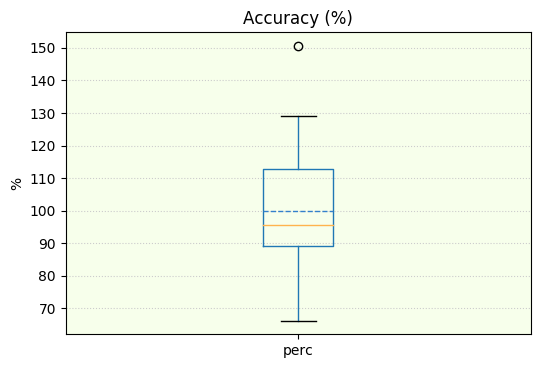

In [36]:
ax = plotBox(df_acc["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Accuracy (%)")
ax.set_ylabel("%")
major = np.arange(70,160,10)
ax.set_yticks(major)
ax.set_facecolor("#CBFF7725")

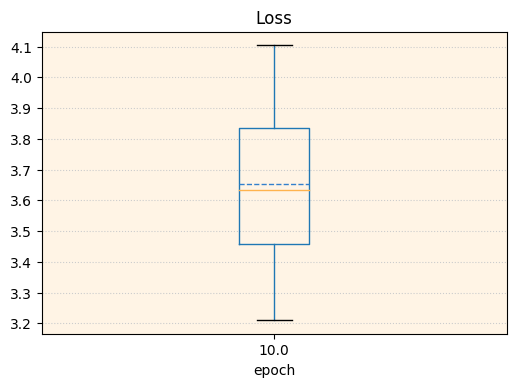

In [39]:
ax = plotBox(df_loss[10])
ax.set_title("Loss")
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_xlabel("epoch")
major = np.arange(3.2,4.2,.1)
ax.set_yticks(major)
ax.set_facecolor("#FFAC3620")

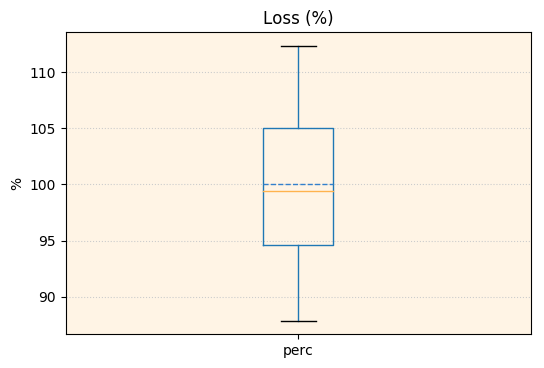

In [27]:
ax = plotBox(df_loss["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_title("Loss (%)")
ax.set_ylabel("%")
ax.set_facecolor("#FFAC3620")

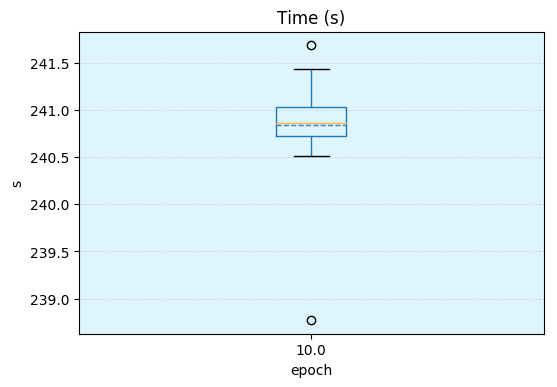

In [28]:
#df_time[10].plot.box(title="Time (s)")
ax = plotBox(df_time[10])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("s")
ax.set_title("Time (s)")
ax.set_xlabel("epoch")
ax.set_facecolor("#00B7FA20")

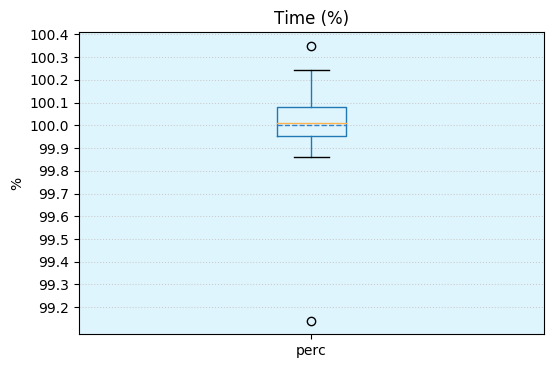

In [40]:
ax = plotBox(df_time["perc"])
ax.yaxis.grid(linestyle=":",color="#cccccc")
ax.set_ylabel("%")
ax.set_title("Time (%)")
major = np.arange(99.2,100.5,0.1)
ax.set_yticks(major)
ax.set_facecolor("#00B7FA20")